In [1]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os

In [2]:
import seaborn as sns

mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

current_palette = sns.color_palette('colorblind', 10)

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/apps/python/3.6-conda5.2/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/apps/python/3.6-conda5.2/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/apps/python/3.6-conda5.2/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel/kernelapp.py", li

In [3]:
vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

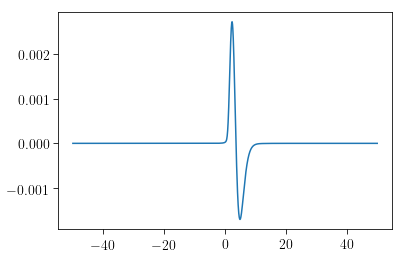

In [4]:
p = pyrex.Particle("nu_e", (0, 0, -1000), (0, 0, 1), 1e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
signal_in = pyrex.AskaryanSignal(times=np.linspace(-50e-9, 50e-9, 2001), particle=p, viewing_angle=np.radians(60), viewing_distance=1000)
plt.plot(signal_in.times*1e9, signal_in.values)
plt.show()

In [5]:
direction = (1, 0, 0)
# direction = [0.12301928,0.09204764,0.98812625]
polarization = (0, 0, 1)
# polarization = [0.73464503,0.66096714,0.15303304]
# np.degrees(np.arccos(direction[2]))
phi = np.arctan2(direction[1],direction[0])
np.degrees(phi)

0.0

In [6]:
# print(np.degrees(np.arccos(np.dot(normalize(direction), normalize(polarization)))))

In [7]:
vpol_mid = vpol.apply_response(signal_in, direction=direction, polarization=polarization, force_real=True)
vpol_out = vpol.front_end(vpol_mid)

hpol_mid = hpol.apply_response(signal_in, direction=direction, polarization=polarization, force_real=True)
hpol_out = hpol.front_end(hpol_mid)

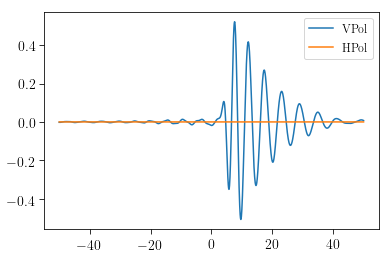

In [8]:
plt.plot(vpol_out.times*1e9, vpol_out.values, label=vpol.name)
plt.plot(hpol_out.times*1e9, hpol_out.values, label=hpol.name)
plt.legend()
plt.show()

# Check Antenna Response Functions

In [9]:
_, direction_theta, direction_phi = vpol.antenna._convert_to_antenna_coordinates(vpol.position - normalize(direction))
print(np.degrees(direction_theta))
print(np.degrees(direction_phi))

90.0
180.0


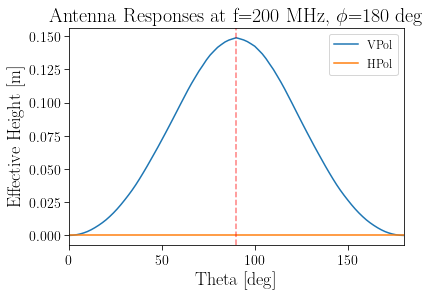

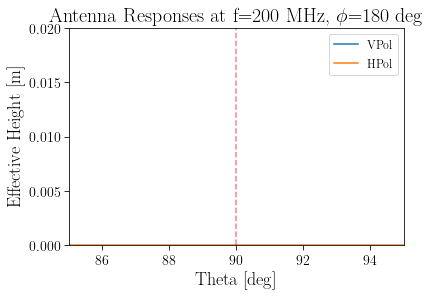

In [10]:
freq = np.array([200e6])
thetas = np.linspace(0, 180, 91)
phi = direction_phi
vpol_resp = [vpol.antenna.directional_response(theta, phi, polarization)(freq)*vpol.antenna.frequency_response(freq) for theta in np.radians(thetas)]
hpol_resp = [hpol.antenna.directional_response(theta, phi, polarization)(freq)*hpol.antenna.frequency_response(freq) for theta in np.radians(thetas)]

plt.plot(thetas, np.abs(vpol_resp), label=vpol.name)
plt.plot(thetas, np.abs(hpol_resp), label=hpol.name)
plt.axvline(np.degrees(direction_theta), c='r', ls='--', alpha=0.5)
plt.xlim(0, 180)
plt.legend()
plt.xlabel("Theta [deg]")
plt.ylabel("Effective Height [m]")
plt.title(f"Antenna Responses at f=200 MHz, $\\phi$={int(round(np.degrees(phi)))} deg")
plt.show()

plt.plot(thetas, np.abs(vpol_resp), label=vpol.name)
plt.plot(thetas, np.abs(hpol_resp), label=hpol.name)
plt.axvline(np.degrees(direction_theta), c='r', ls='--', alpha=0.5)
plt.xlim(np.degrees(direction_theta)-5, np.degrees(direction_theta)+5)
plt.ylim(0, 0.02)
plt.legend()
plt.xlabel("Theta [deg]")
plt.ylabel("Effective Height [m]")
plt.title(f"Antenna Responses at f=200 MHz, $\\phi$={int(round(np.degrees(phi)))} deg")
plt.show()

Text(0,0.5,'Effective Height [m]')

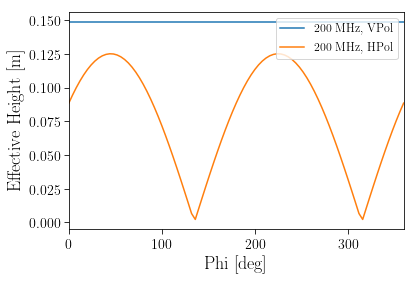

In [11]:
freq = np.array([200e6])
phi = np.radians(90)
phis = np.linspace(0, 360, 91)
vpol_pol = (0, 0, 1)
hpol_pol = (-np.sin(phi),np.sin(phi) , 0)
vpol_resp = [vpol.antenna.directional_response(np.pi/2, phi, vpol_pol)(freq)*vpol.antenna.frequency_response(freq) for phi in np.radians(phis)]
hpol_resp = [hpol.antenna.directional_response(np.pi/2, phi, hpol_pol)(freq)*hpol.antenna.frequency_response(freq) for phi in np.radians(phis)]

plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
plt.xlim(0, 360)
plt.legend(loc="upper right")
plt.xlabel("Phi [deg]")
plt.ylabel("Effective Height [m]")
# plt.title(f"Antenna Response, $\\theta$={int(round(180-np.degrees(theta)))} deg")
# plt.show()

# plt.plot(phis, np.abs(vpol_resp), label=vpol.name)
# plt.plot(phis, np.abs(hpol_resp), label=hpol.name)
# plt.axvline(np.degrees(direction_phi), c='r', ls='--', alpha=0.5)
# plt.xlim(np.degrees(direction_phi)-5, np.degrees(direction_phi)+5)
# plt.ylim(0, 0.02)
# plt.legend()
# plt.xlabel("Phi [deg]")
# plt.ylabel("Effective Height [m]")
# plt.title(f"Antenna Responses at f=200 MHz, $\\theta$={int(round(np.degrees(theta)))} deg")
# plt.show()
# plt.savefig("./plots/Antennas/Antenna_response.png", dpi=200)

In [12]:
dir_prop=np.array([0.88184633,0.31698902,-0.34909169])
theta_=np.arccos(dir_prop[2])
phi_=np.arctan(dir_prop[1]/dir_prop[0])
print("phi_rec:%0.2f"%np.degrees(phi_))
print("theta_rec:%0.2f"%np.degrees(theta_))


phi_rec:19.77
theta_rec:110.43


Text(0,0.5,'Heff [m]')

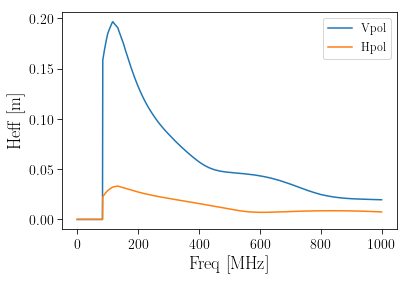

In [13]:
freqs = np.linspace(0,1,1000)
hpol_pol = np.array([np.sin(phi),-np.cos(phi) , 0])
vpol_pol = np.array([0,0,-1/np.sin(theta_)])
vpolResp = vpol.antenna.directional_response(theta_,phi_, vpol_pol)(freqs*1E9)*vpol.antenna.frequency_response(freqs*1E9)
hpolResp = hpol.antenna.directional_response(theta_,phi_, hpol_pol)(freqs*1E9)*hpol.antenna.frequency_response(freqs*1E9)
plt.plot(freqs*1000,abs(vpolResp),label="Vpol")
plt.plot(freqs*1000,abs(hpolResp), label="Hpol")
plt.legend()
plt.xlabel("Freq [MHz]")
plt.ylabel("Heff [m]")

# plt.xlim(100,1000)

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


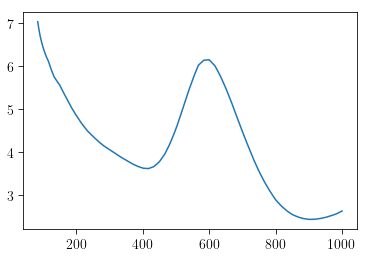

In [14]:
plt.plot(freqs*1000,abs(vpolResp)/abs(hpolResp))

In [15]:
ARASIM_VPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_bicone6in_output.txt")
ARASIM_HPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_dipoletest1_output.txt")
# Vpol data file contains only the theta responses
ARASIM_VPOL_THETA_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_VPOL_DATA_FILE)
ARASIM_VPOL_RESPONSE_DATA = (
    ARASIM_VPOL_THETA_RESPONSE_DATA[0],
    np.zeros(ARASIM_VPOL_THETA_RESPONSE_DATA[0].shape),
    *ARASIM_VPOL_THETA_RESPONSE_DATA[1:]
)
# Hpol data file contains only the phi responses
ARASIM_HPOL_PHI_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_HPOL_DATA_FILE)
ARASIM_HPOL_RESPONSE_DATA = (
    np.zeros(ARASIM_HPOL_PHI_RESPONSE_DATA[0].shape),
    *ARASIM_HPOL_PHI_RESPONSE_DATA
)

In [16]:
class AraSimHpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_HPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)
class AraSimVpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_VPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)

In [17]:
vpolARA = AraSimVpol("VPol", (0, 0, -200), 0)
hpolARA = AraSimHpol("HPol", (0, 0, -200), 0)


Text(0,0.5,'Effective Height [m]')

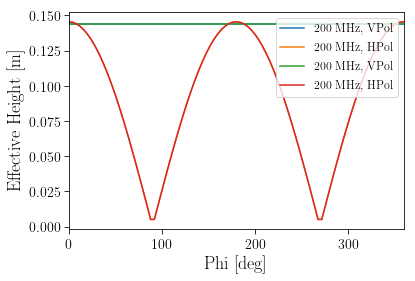

In [18]:
freq = np.array([200e6])
# phi = np.radians(90)
phis = np.linspace(0, 360, 91)
vpol_pol = (0, 0, 1)
hpol_pol = (0,1 , 0)
vpol_resp = [vpolARA.antenna.directional_response(direction_theta, phi, vpol_pol)(freq)*vpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]
hpol_resp = [hpolARA.antenna.directional_response(direction_theta, phi, hpol_pol)(freq)*hpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]

plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
plt.xlim(0, 360)
plt.legend(loc="upper right")
plt.xlabel("Phi [deg]")
plt.ylabel("Effective Height [m]")
# plt.title(f"Antenna Response, $\\theta$={int(round(180-np.degrees(theta)))} deg")

In [19]:
freqs = np.linspace(0,1,100)
freq_resp = vpolARA.antenna.frequency_response(freqs*1E9)*vpolARA.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)
freq_resp_Ch = vpol.antenna.frequency_response(freqs*1E9)*vpol.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)

In [21]:
plt.plot(freqs*1000, abs(freq_resp), label = "ARA_bicone6in_output.txt")
plt.plot(freqs*1000, abs(freq_resp_Ch), label = "Vpol_original_CrossFeed_150mmHole_Ice")
plt.ylim(0,0.3)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
plt.title("Vpol response")
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/Antennas/Vpol_comparison.png", dpi=200)


RuntimeError: latex was not able to process the following string:
b'ARA_bicone6in_output.txt'

Here is the full report generated by latex:
latex: /apps/python/3.6-conda5.2/lib/libtiff.so.5: no version information available (required by /lib64/libpoppler.so.46)
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/users/PCON0003/cond0068/.cache/matplotlib/tex.cache/5bb1ebd531211ddbea4c1da3f
95d052f.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucs.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/data/uni-global.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/utf8x.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./5bb1ebd531211ddbea4c1da3f95d052f.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucsencs.def)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.15 ...tsize{12.000000}{15.000000}{\rmfamily ARA_
                                                  bicone6in_output.txt}
No pages of output.
Transcript written on 5bb1ebd531211ddbea4c1da3f95d052f.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2b0f26b84840> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'ARA_bicone6in_output.txt'

Here is the full report generated by latex:
latex: /apps/python/3.6-conda5.2/lib/libtiff.so.5: no version information available (required by /lib64/libpoppler.so.46)
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/users/PCON0003/cond0068/.cache/matplotlib/tex.cache/5bb1ebd531211ddbea4c1da3f
95d052f.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucs.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/data/uni-global.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/utf8x.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./5bb1ebd531211ddbea4c1da3f95d052f.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucsencs.def)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.15 ...tsize{12.000000}{15.000000}{\rmfamily ARA_
                                                  bicone6in_output.txt}
No pages of output.
Transcript written on 5bb1ebd531211ddbea4c1da3f95d052f.log.




RuntimeError: latex was not able to process the following string:
b'ARA_bicone6in_output.txt'

Here is the full report generated by latex:
latex: /apps/python/3.6-conda5.2/lib/libtiff.so.5: no version information available (required by /lib64/libpoppler.so.46)
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/users/PCON0003/cond0068/.cache/matplotlib/tex.cache/5bb1ebd531211ddbea4c1da3f
95d052f.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucs.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/data/uni-global.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/utf8x.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./5bb1ebd531211ddbea4c1da3f95d052f.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucsencs.def)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.15 ...tsize{12.000000}{15.000000}{\rmfamily ARA_
                                                  bicone6in_output.txt}
No pages of output.
Transcript written on 5bb1ebd531211ddbea4c1da3f95d052f.log.




<Figure size 432x288 with 1 Axes>

In [ ]:
freq_resp_H = hpolARA.antenna.frequency_response(freqs*1E9)*hpolARA.antenna.directional_response(np.pi/2, phi, hpol_pol)(freqs*1E9)
freq_resp_Ch_H = hpol.antenna.frequency_response(freqs*1E9)*hpol.antenna.directional_response(np.pi/2, phi, hpol_pol)(freqs*1E9)

In [ ]:
plt.plot(freqs*1000, abs(freq_resp_H), label = "ARA_dipoletest1_output.txt")
plt.plot(freqs*1000, abs(freq_resp_Ch_H), label = "Hpol_original_150mmHole_Ice_ARASim.txt")
plt.ylim(0,0.35)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
plt.title("Hpol response")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/Antennas/Hpol_comparison.png", dpi=200)


In [ ]:
freq = np.array([200e6])
# phi = np.radians(90)
phis = np.linspace(0, 360, 91)
# vpol_pol = (0, 0, 1)
# hpol_pol = (np.cos(phi),np.sin(phi) , 0)
vpol_resp = [vpolARA.antenna.directional_response(direction_theta, phi, vpol_pol)(freq)*vpol.antenna.frequency_response(freq) for phi in np.radians(phis)]
hpol_resp = [hpolARA.antenna.directional_response(direction_theta, phi, hpol_pol)(freq)*hpol.antenna.frequency_response(freq) for phi in np.radians(phis)]

plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
plt.xlim(0, 360)
plt.legend(loc="upper right")
plt.xlabel("Phi [deg]")
plt.ylabel("Effective Height [m]")

In [ ]:
# dirProp=[0.11795294,0.01004612,0.99296837]
# pol_vec=[-0.75565743,-0.64784625,0.09631763]
# phi = np.arctan2(dirProp[1],dirProp[0])
# theta = np.arccos(dirProp[2])
freq_resp_H = hpolARA.antenna.frequency_response(freqs*1E9)*hpolARA.antenna.directional_response(np.pi/2, 0, pol_vec)(freqs*1E9)
plt.plot(freqs,abs(freq_resp_H), labe)
freq_resp_V = vpolARA.antenna.frequency_response(freqs*1E9)*vpolARA.antenna.directional_response(np.pi/2, 0, pol_vec)(freqs*1E9)
plt.plot(freqs,abs(freq_resp_V))

# freq_resp_H = hpol.antenna.frequency_response(freqs*1E9)*hpol.antenna.directional_response(theta, 0, pol_vec)(freqs*1E9)
# plt.plot(freqs,abs(freq_resp_H))


# Fix polarization

In [ ]:
freq = np.array([200e6])
# phi = np.radians(90)
phis = np.linspace(0, 360, 91)
vpol_pol = (0, 0, 1)
# hpol_pol = (0,1,0)
def getH_pol(phi):
    return (np.sin(phi),-np.cos(phi),0)

vpol_resp = [vpol.antenna.directional_response(np.pi/2, phi, vpol_pol)(freq)*vpol.antenna.frequency_response(freq) for phi in np.radians(phis)]
hpol_resp = [hpol.antenna.directional_response(np.pi/2, phi, getH_pol(phi))(freq)*hpol.antenna.frequency_response(freq) for phi in np.radians(phis)]

plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
plt.xlim(0, 360)
plt.legend(loc="upper right")
plt.xlabel("Phi [deg]")
plt.ylabel("Effective Height [m]")